In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

df = pd.read_excel('../archive/titanic3.xlsx')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [2]:
print(df.columns)
df.isnull().sum()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

decision tree with body and boat
and one without

In [3]:
df.shape

(1309, 14)

In [4]:
df.dropna(subset=['age'], inplace=True)

In [5]:
df.shape

(1046, 14)

In [6]:
columns_to_encode = ['sex','embarked']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

In [9]:
encoded_df.head(3)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1


<img src='../Images/columns.png'/>

In [10]:
print(encoded_df.columns)
encoded_df.isnull().sum()

Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'boat', 'body', 'home.dest', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')


pclass          0
survived        0
name            0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin         774
boat          629
body          926
home.dest     361
sex_female      0
sex_male        0
embarked_C      0
embarked_Q      0
embarked_S      0
dtype: int64

In [11]:
print(encoded_df.shape)
encoded_df.dropna(subset=['fare'], inplace=True)
print(encoded_df.shape)

(1046, 17)
(1045, 17)


In [12]:
columns_to_drop = ['cabin', 'boat', 'body', 'home.dest']
encoded_df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(encoded_df.shape)

(1045, 13)


In [13]:
encoded_df.dtypes

pclass          int64
survived        int64
name           object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
sex_female      uint8
sex_male        uint8
embarked_C      uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object

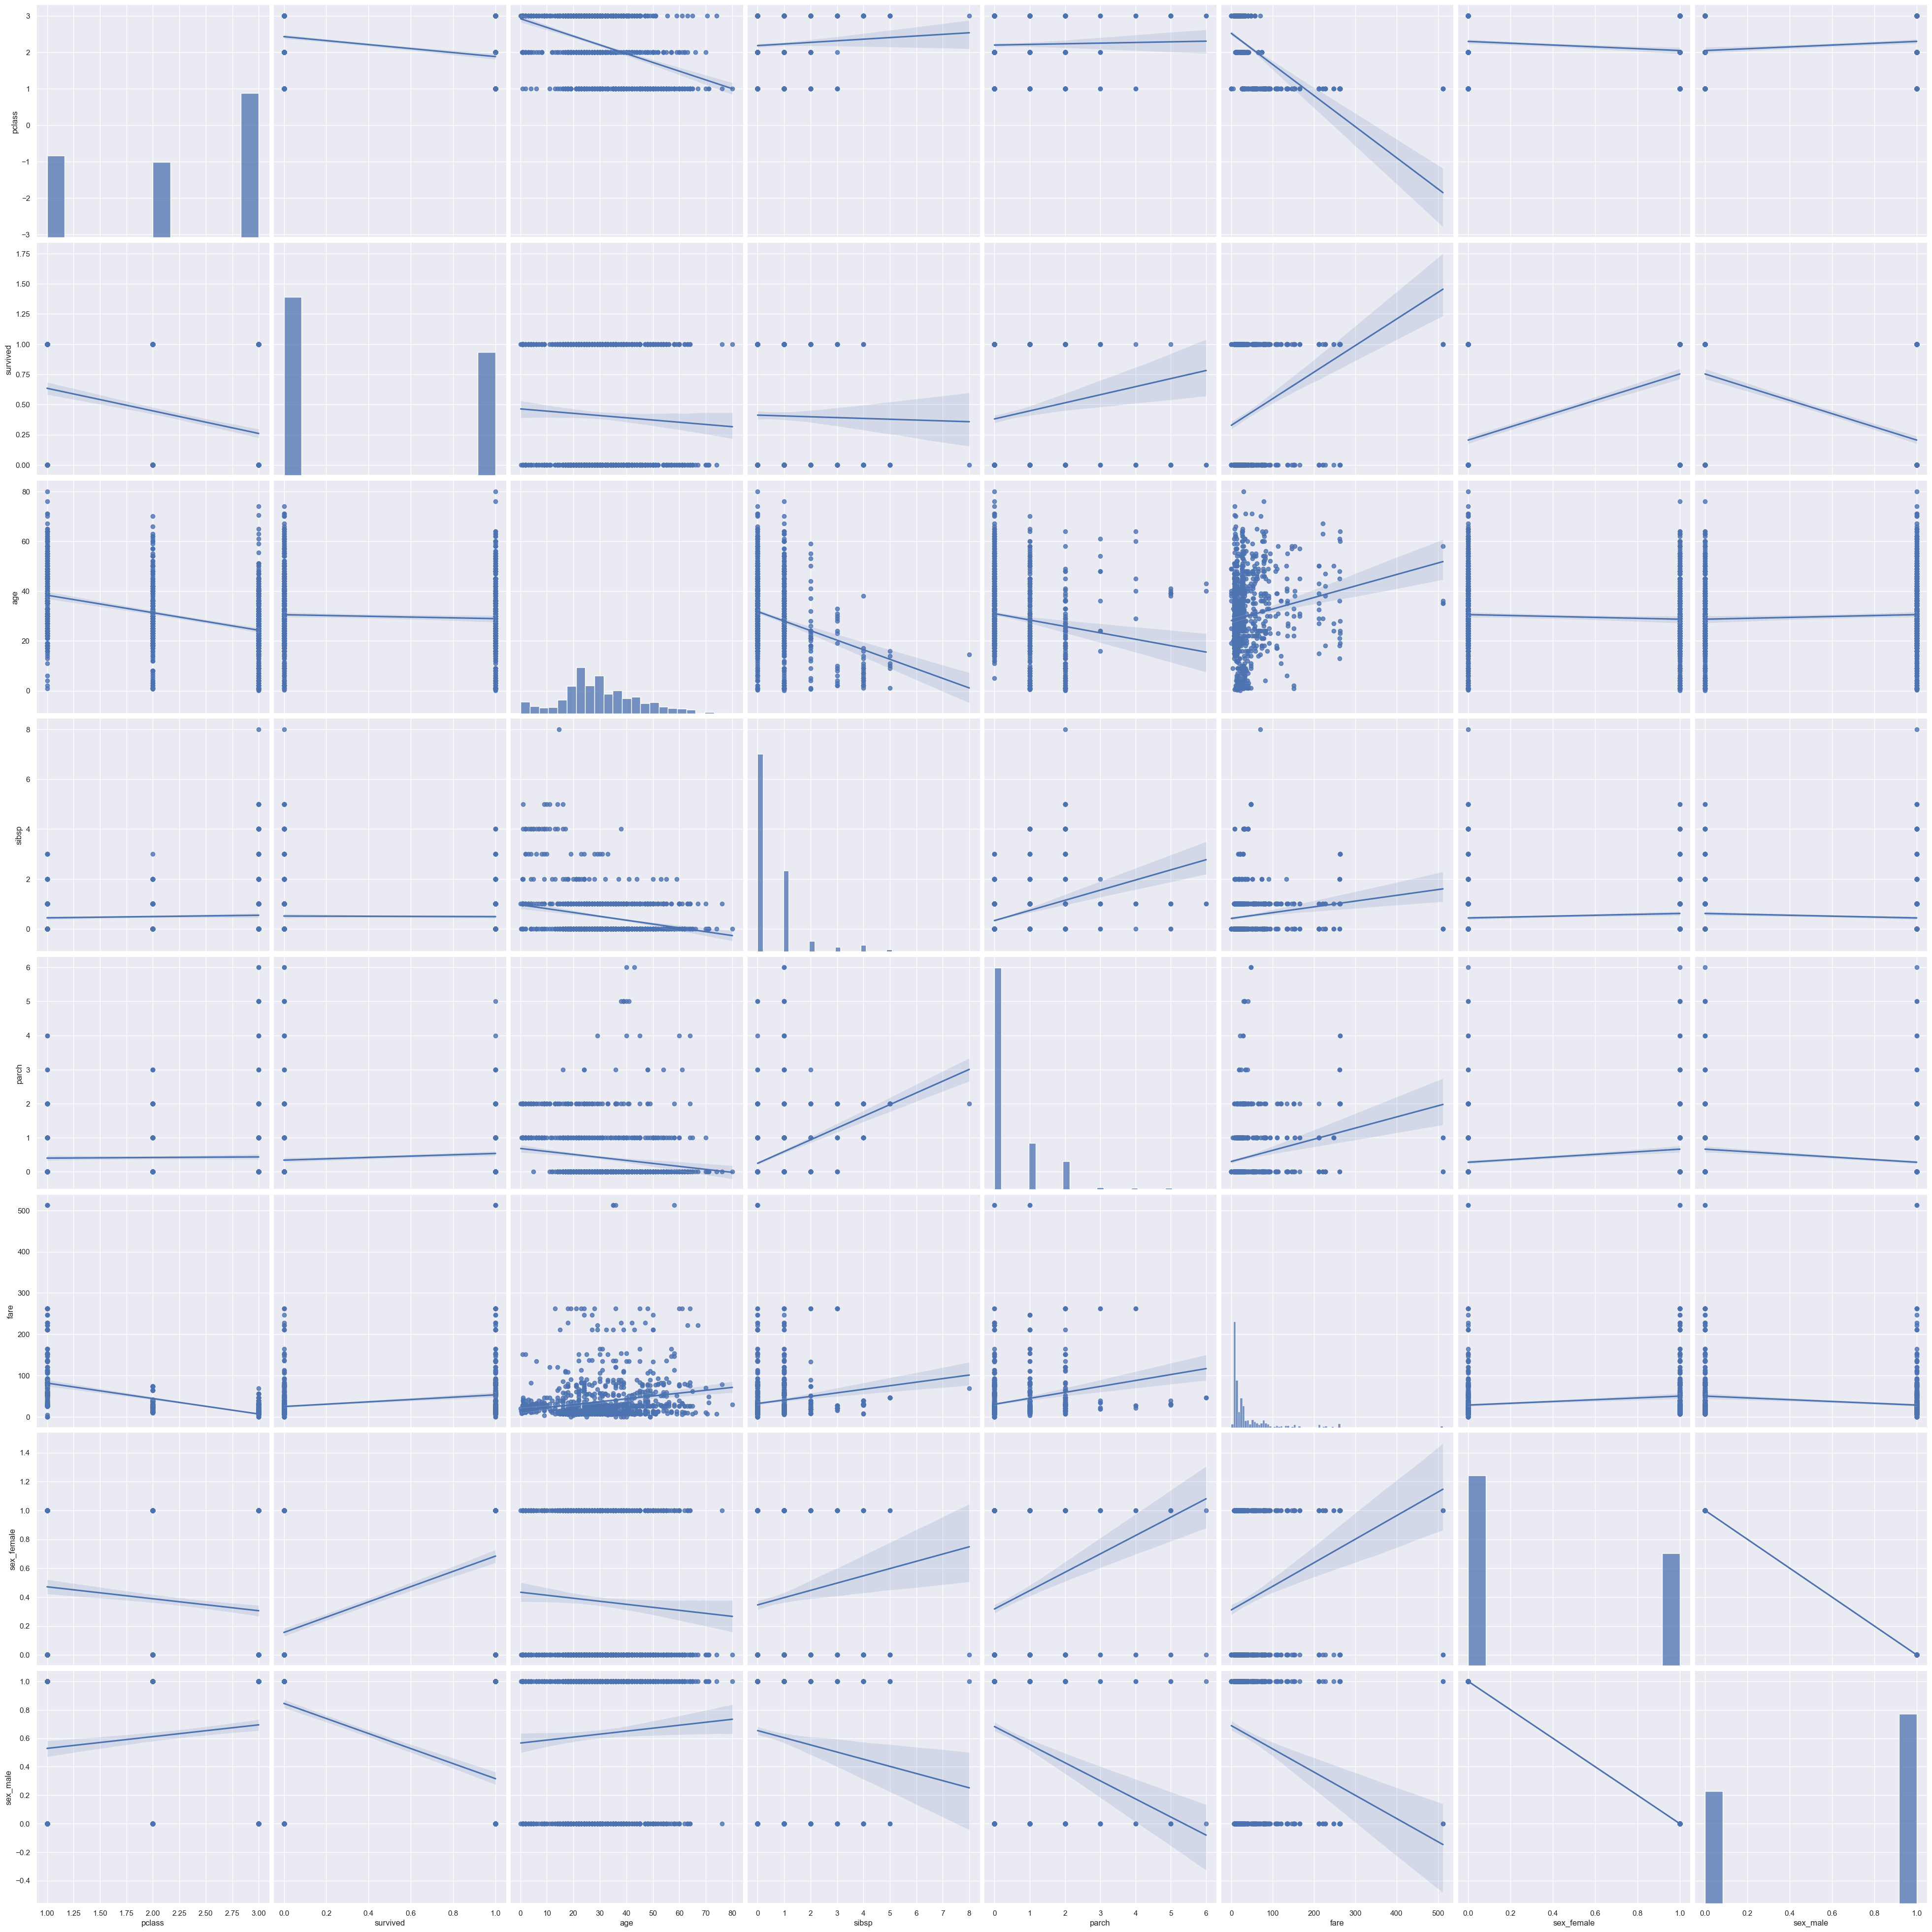

In [15]:
d = sns.pairplot(encoded_df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male']], height=5, kind="reg")

In [16]:
import scipy.stats

# Assuming df is your DataFrame with 'pclass' and 'survived' columns
correlation, p_value = scipy.stats.pointbiserialr(encoded_df['pclass'], encoded_df['survived'])
print(f"Point-Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")


Point-Biserial Correlation: -0.3199789967887327
P-value: 2.6308545713108013e-26


The median is:  2.0


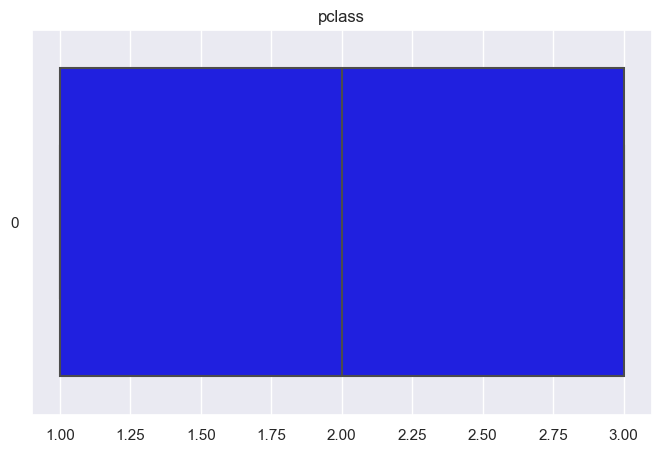

The median is:  0.0


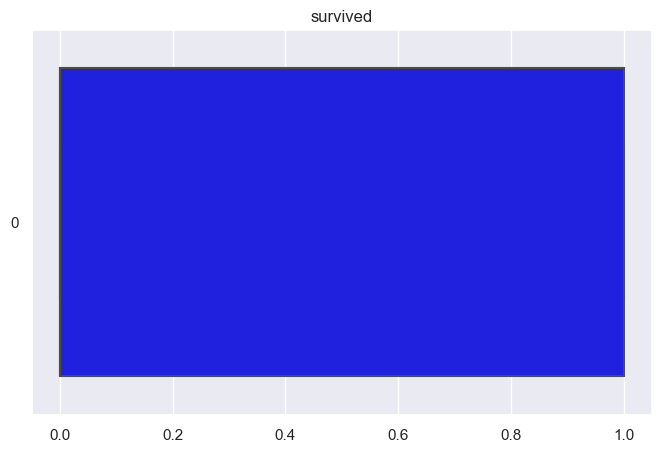

The median is:  28.0


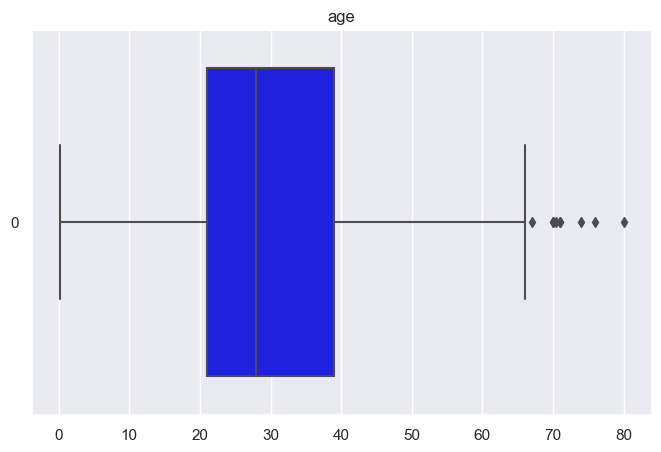

The median is:  0.0


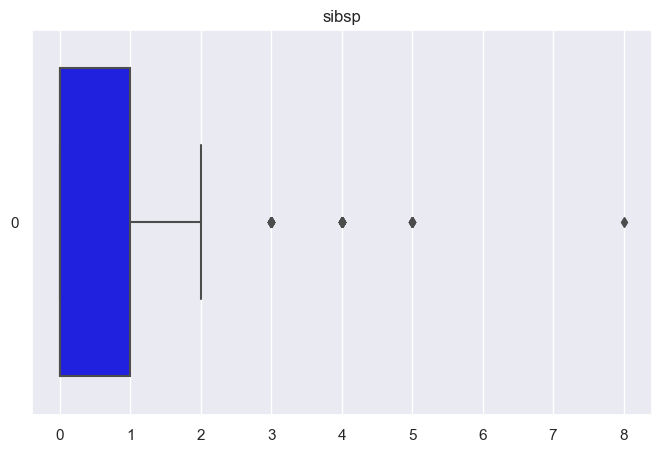

The median is:  0.0


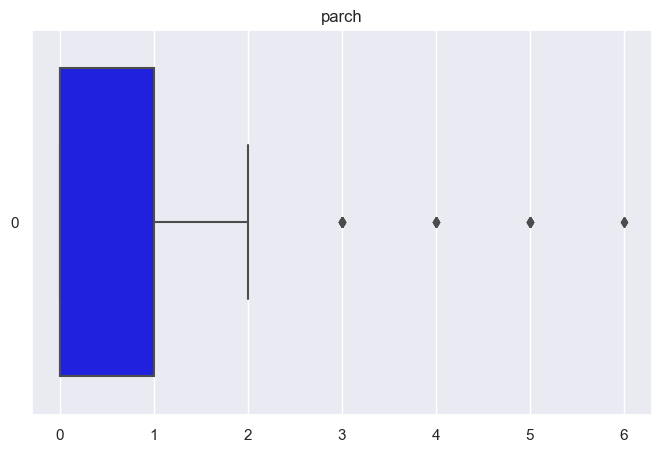

The median is:  15.75


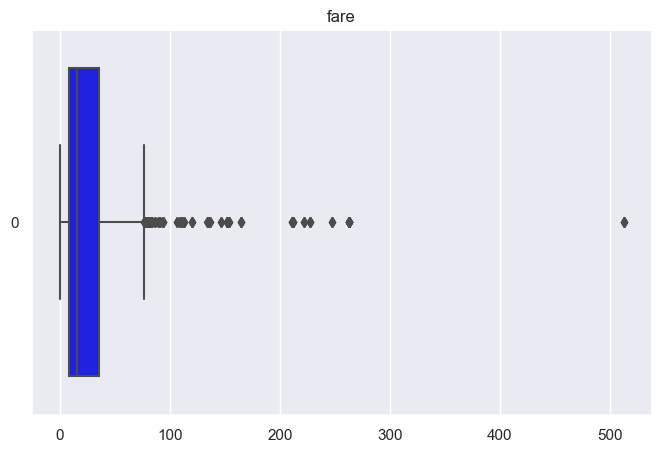

The median is:  0.0


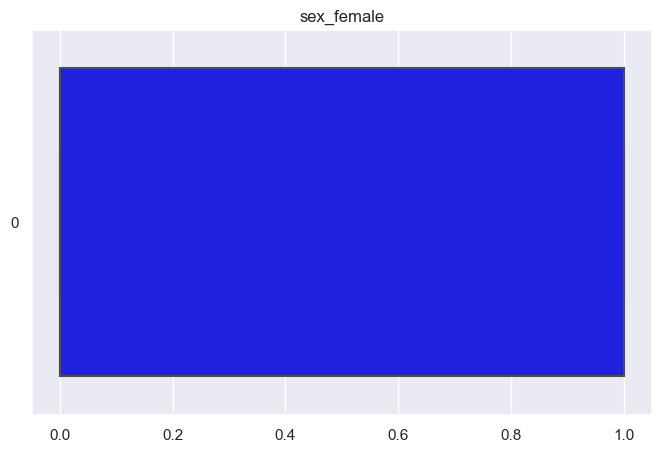

The median is:  1.0


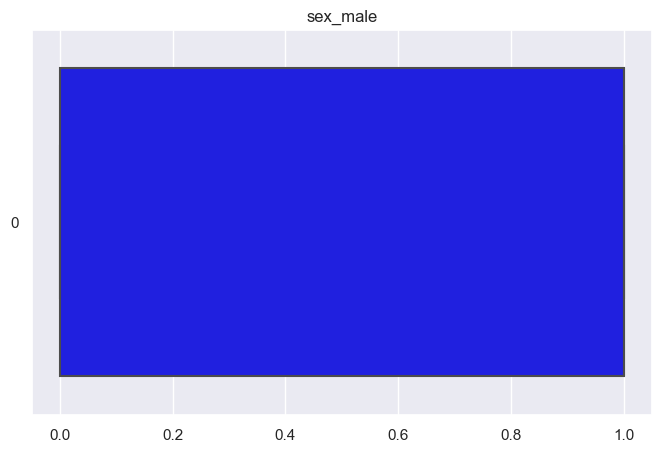

In [18]:
n_variables = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male']
sns.set(rc={'figure.figsize':(8,5)})
for c in n_variables:
    x = encoded_df[c].values
    ax = sns.boxplot(x, orient='h', color= 'blue')
    print('The median is: ', encoded_df[c].median())
    plt.title(c)
    plt.show()


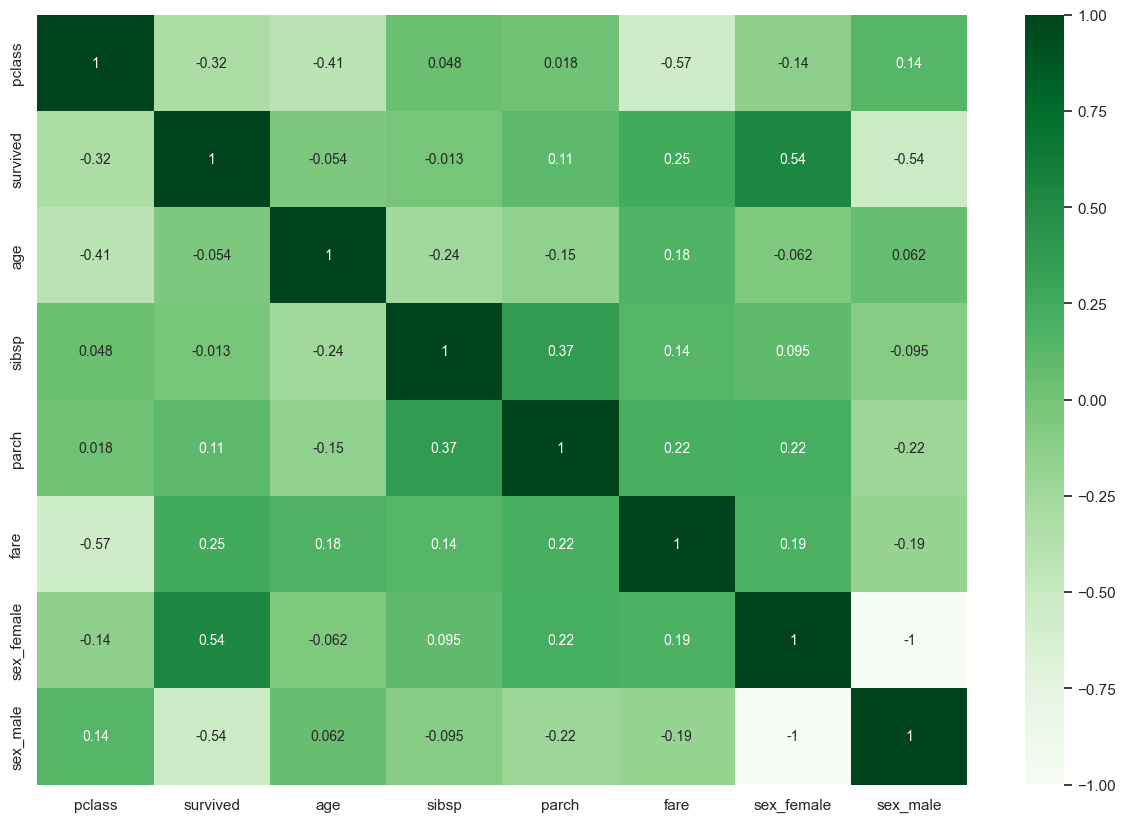

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
pc =  encoded_df[n_variables].corr(method='pearson')
cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 10},
                 cmap="Greens")

In [20]:
encoded_df.columns

Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [21]:
x = encoded_df.drop(['name', 'ticket', 'embarked_C', 'embarked_Q', 'embarked_S', 'survived'], axis = 1).values
x_columns = encoded_df.drop(['name', 'ticket', 'embarked_C', 'embarked_Q', 'embarked_S', 'survived'], axis=1)
y = encoded_df['survived'].astype(int)

print(x.shape)
print(y.shape)

(1045, 7)
(1045,)


In [22]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [23]:
dt.feature_importances_

array([0.15276977, 0.19664201, 0.06703678, 0.01941907, 0.23199862,
       0.33213374, 0.        ])

In [24]:
#del final_fi
for i, column in enumerate(encoded_df.drop(['name', 'ticket', 'embarked_C', 'embarked_Q', 'embarked_S', 'survived'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = fi

final_fi = final_fi.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi


Importance of feature pclass:, 0.153
Importance of feature age:, 0.197
Importance of feature sibsp:, 0.067
Importance of feature parch:, 0.019
Importance of feature fare:, 0.232
Importance of feature sex_female:, 0.332
Importance of feature sex_male:, 0.000


,index,Variable,Feature Importance Score
0,5,sex_female,0.332134
1,4,fare,0.231999
2,1,age,0.196642
3,0,pclass,0.152770
4,2,sibsp,0.067037
5,3,parch,0.019419
6,6,sex_male,0.000000


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.2, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(836, 7)
(209, 7)
(836,)
(209,)


In [26]:
lm = LinearRegression(fit_intercept=True)
lm.fit(x_train, y_train)

y_pred = lm.predict(x_train)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from math import sqrt

print('The Accuracy  on the training dataset is: ', lm.score(x_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(x_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(x_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(x_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


The Accuracy  on the training dataset is:  0.375222641134184
The Accuracy r2  on the training dataset prediction is:  0.375222641134184

The Accuracy  on the testing dataset is:  0.36665458083646196

The RMSE  on the training dataset is:  0.38655923215935245
The RMSE  on the testing dataset is:  0.39659649253576434

The MAE  on the training dataset is:  0.30244392804892645
The MAE  on the testing dataset is:  0.3057848938544875

Coefficients:  [-0.1734182  -0.00612592 -0.05524342  0.02087684  0.00028265  0.2447545
 -0.2447545 ]

Intercept:  1.0341567951199158


In [29]:
final_fi['Variable'][0:3].values

array(['sex_female', 'fare', 'age'], dtype=object)

In [32]:
test1 = final_fi['Variable'][0:3].values

x2 = encoded_df[test1].values
y2 = encoded_df['survived'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x2, y2, train_size=0.80, test_size=0.2, random_state=15)

print(x.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept=True)
lm2.fit(x_train, y_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(x_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(x_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(x_test)))

(1045, 7)
(1045,)
The Accuracy  on the testing dataset is:  0.3037494446609771
The RMSE  on the testing dataset is:  0.4158257020660221
The MAE  on the testing dataset is:  0.3410819355392852


In [33]:
from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=3, step=1)
selector = selector.fit(x, y)
selector.support_

print('The chosen best 3 features by rfe:',x_columns.columns[selector.support_])

rfe_lr = x_columns.columns[selector.support_]

The chosen best 3 features by rfe: Index(['pclass', 'sex_female', 'sex_male'], dtype='object')


In [34]:
rfe_lr

Index(['pclass', 'sex_female', 'sex_male'], dtype='object')

In [35]:
# Split the data into X & y

test1 = rfe_lr

X2 = encoded_df[test1].values
y2 = encoded_df['survived'].astype(int)

# Hold-out validation
x_train, x_test, y_train, y_test = train_test_split(x2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(x.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(x_train, y_train)

y_pred = lm2.predict(x_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(x_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(x_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(x_test)))

(1045, 7)
(1045,)
The Accuracy  on the testing dataset is:  0.3037494446609771
The RMSE  on the testing dataset is:  0.4158257020660221
The MAE  on the testing dataset is:  0.3410819355392852


In [36]:
# With Support vector regressor

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x, y)
selector.support_
print('Chosen best 3 feature by rfe:',x_columns.columns[selector.support_])

rfe_svr = x_columns.columns[selector.support_]

Chosen best 3 feature by rfe: Index(['parch', 'sex_female', 'sex_male'], dtype='object')


In [37]:
# Split the data into X & y

test1 = rfe_svr

X2 = encoded_df[test1].values
y2 = encoded_df['survived'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(x.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(1045, 7)
(1045,)
The Accuracy  on the testing dataset is:  0.28929259160597653
The RMSE  on the testing dataset is:  0.42012059648314
The MAE  on the testing dataset is:  0.3485668716849723


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(x2, y2, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(n_estimators=2000, max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.3421331642580716
The RMSE  on the testing dataset is:  0.40420115375942695
The MAE  on the testing dataset is:  0.32585118902785143


In [74]:
feature_cols = ['pclass','age','sibsp','parch','fare','sex_female','sex_male']
df_valuable = encoded_df[feature_cols]

X = df_valuable
y = encoded_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=6)
clf = clf.fit(X, y)
predictions = clf.predict(X_test)
y_pred = np.round(predictions).astype(int)
int_y_test = y_test.astype(int).values
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8851674641148325


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male']
df_valuable = encoded_df[feature_cols]

X = df_valuable
y = encoded_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(n_estimators=16, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

compare_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8038277511961722


C:\Users\dinab\AppData\Local\Temp\ipykernel_33460\3481078489.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  compare_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

# Define your feature columns and target variable
feature_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male']
df_valuable = encoded_df[feature_cols]
X = df_valuable
y = encoded_df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Hyperparameter tuning using GridSearchCV with a Random Forest classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
clf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", clf.best_params_)


Accuracy: 0.8181818181818182
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
